In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import os
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
from sklearn import datasets
import time

Could not import rpy package
Could not import r-package RCIT


In [2]:
#data = pd.read_csv("/home/pbatungwanay/Bureau/Muy_climate_crop_data.csv", index_col=[0], parse_dates=True)
#data = pd.read_csv("/home/pbatungwanay/Bureau/Beans.csv", index_col=[0,1], parse_dates=True)
#data = pd.read_csv("/home/pbatungwanay/Bureau/Beans_Muy_Climate.csv", index_col=[0], parse_dates=True)
data = pd.read_csv("/home/pbatungwanay/Bureau/Data/Maize_Muy_Climate_pro.csv", index_col=[0], parse_dates=True)
data.head()

,MP,onset,cessation,duration,SS,MS,Annual
Year,,,,,,,
1961-01-01,95000,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,92900,NaN,NaN,NaN,NaN,NaN,NaN
1963-01-01,91900,NaN,NaN,NaN,NaN,NaN,NaN
1964-01-01,109200,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-01,107900,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 1961-01-01 to 2017-01-01
Data columns (total 7 columns):
MP           57 non-null int64
onset        32 non-null float64
cessation    32 non-null float64
duration     32 non-null float64
SS           32 non-null float64
MS           32 non-null float64
Annual       32 non-null float64
dtypes: float64(6), int64(1)
memory usage: 3.6 KB


In [4]:
data.head()

,MP,onset,cessation,duration,SS,MS,Annual
Year,,,,,,,
1961-01-01,95000,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,92900,NaN,NaN,NaN,NaN,NaN,NaN
1963-01-01,91900,NaN,NaN,NaN,NaN,NaN,NaN
1964-01-01,109200,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-01,107900,NaN,NaN,NaN,NaN,NaN,NaN


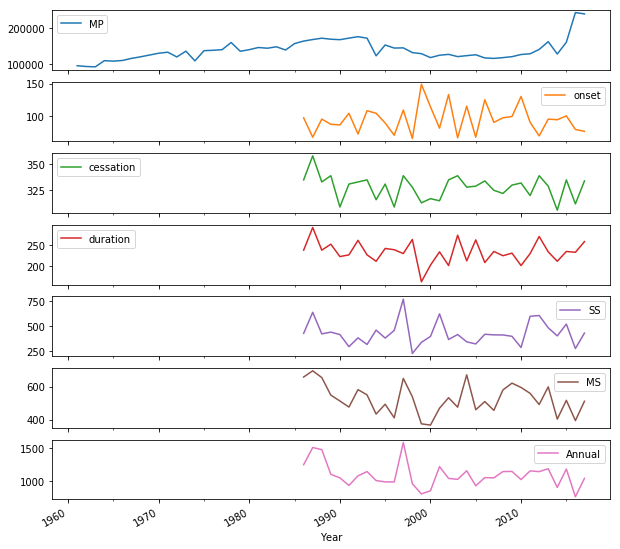

In [5]:
data.plot(subplots=True, figsize=(10, 10))
plt.show()

In [6]:
data.columns

Index(['MP', 'onset', 'cessation', 'duration', 'SS', 'MS', 'Annual'], dtype='object')

In [9]:
data=data.diff()

# remplissage des données manquantes
data = data.fillna(999)



#T = 21     # time series length
#data, true_parents_neighbors = pp.var_process(data, T=T)
#T, N = data.shape
# préparation de la dataframe au format "tigramite"
datatime = np.arange(len(data.values))
datatime


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56])

In [10]:
dataframe = pp.DataFrame(data.values,var_names =data.columns,  # nom des variables
                         missing_flag=999)   # valeurs manquantes reconnues


(<Figure size 360x576 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed8c59f6a0>,
       dtype=object))

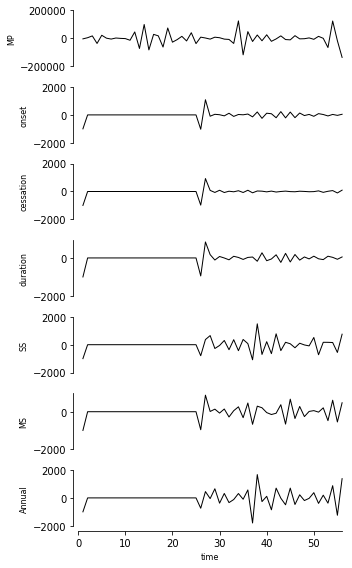

In [11]:
tp.plot_timeseries(dataframe,figsize=(5, 8))
                     # visualisation de la dataframe tigramite
#plt.show()


In [22]:
start_time = time.time()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

results = pcmci.run_pcmci(tau_max=3, pc_alpha= None)

pcmci.print_significant_links(
       p_matrix = results['p_matrix'], 
       val_matrix = results['val_matrix'],
       alpha_level = 0.01)
                
print("--- %.2f secondes ---" % (time.time() - start_time))


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = None
max_conds_dim = None
max_combinations = 1



## Variable MP

## Variable onset

## Variable cessation

## Variable duration

## Variable SS

## Variable MS

## Variable Annual

## Resulting condition sets:

    Variable MP has 3 parent(s):
    [pc_alpha = 0.5]
        (MP -1): max_pval = 0.00000, min_val = 0.644
        (MP -2): max_pval = 0.43638, min_val = 0.113
        (SS -3): max_pval = 0.44797, min_val = 0.110

    Variable onset has 3 parent(s):
    [pc_alpha = 0.4]
        (onset -1): max_pval = 0.03633, min_val = 0.300
        (onset -2): max_pval = 0.33353, min_val = 0.140
        (MS -1): max_pval = 0.36483, min_val = 0.132

    Variable cessation has 1 parent(s):
    [pc_alpha = 0.2]
        (cessation -1): max_pval = 0.13022, min_val = 0.219

    Variable duration has 3 parent(s):
    [pc_alpha = 0.3]
        (duration -1): max_pval = 0.05561, min_val 


## Estimating lagged dependencies


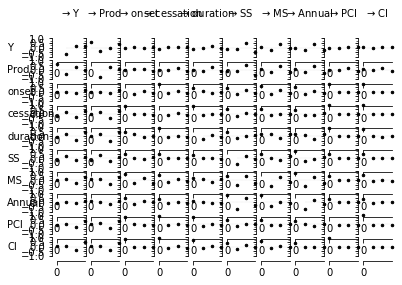

In [75]:
correlations = pcmci.get_lagged_dependencies(tau_max=5)
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':data.columns, 
                                    'x_base':5, 'y_base':.5})

In [76]:
#pcmci.verbosity = 1
#results = pcmci.run_pcmci(tau_max=5, pc_alpha=None)

In [77]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.    0.    0.001]
  [0.    0.054 0.584 0.343]
  [0.31  0.805 0.964 0.43 ]
  [0.247 0.348 0.602 0.539]
  [0.035 0.233 0.374 0.175]
  [0.26  0.263 0.691 0.836]
  [0.801 0.373 0.022 0.643]
  [0.033 0.893 0.004 0.002]
  [0.825 0.864 0.562 0.843]
  [0.873 0.714 0.421 0.898]]

 [[0.    0.256 0.105 0.232]
  [1.    0.    0.003 0.232]
  [0.21  0.82  0.747 0.397]
  [0.56  0.359 0.413 0.052]
  [0.043 0.205 0.323 0.032]
  [0.076 0.095 0.456 0.048]
  [0.388 0.349 0.023 0.304]
  [0.777 0.368 0.006 0.001]
  [0.639 0.383 0.432 0.093]
  [0.928 0.561 0.423 0.122]]

 [[0.31  0.326 0.551 0.564]
  [0.21  0.289 0.371 0.89 ]
  [1.    0.092 0.365 0.502]
  [0.    0.522 0.772 0.54 ]
  [0.004 0.392 0.511 0.995]
  [0.004 0.398 0.552 0.44 ]
  [0.    0.104 0.982 0.757]
  [0.001 0.11  0.485 0.417]
  [0.    0.87  0.907 0.909]
  [0.    0.609 0.976 0.898]]

 [[0.247 0.192 0.069 0.223]
  [0.56  0.147 0.127 0.725]
  [0.    0.965 0.859 0.467]
  [1.    0.318 0.624 0.481]
  [0.    0.329 0.876 0.969]
  [0.

# Plotting

In [23]:
#Saving the resultats

np.save('/home/pbatungwanay/Bureau/Muyinga/maize/p_diff_muy',results['p_matrix'])
np.save('/home/pbatungwanay/Bureau/Muyinga/maize/val_diff_muy',results['val_matrix'])

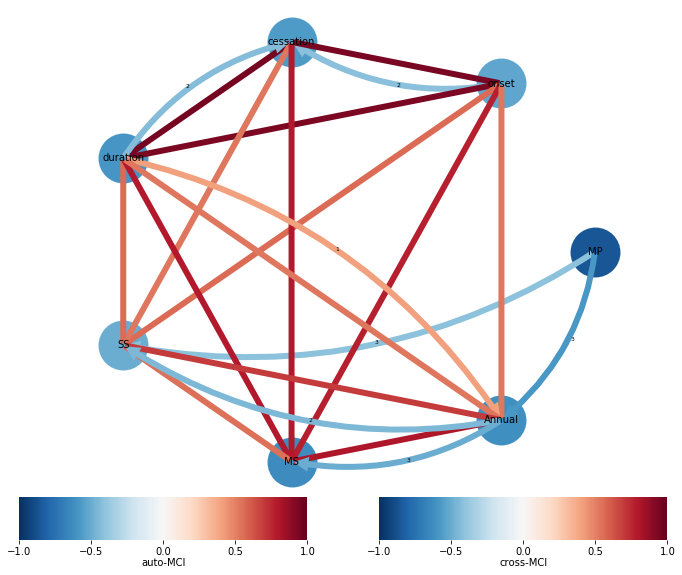

In [24]:
p = np.load('/home/pbatungwanay/Bureau/Muyinga/maize/p_diff_muy.npy')
val = np.load('/home/pbatungwanay/Bureau/Muyinga/maize/val_diff_muy.npy')

link_matrix = pcmci.return_significant_parents(pq_matrix=p,
                                                       val_matrix=val,
                                                       alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=val,
    figsize=(10, 10),
    node_size=50,
    arrowhead_size=1.0,
    #arrow_linewidth=20.0,
    link_matrix=link_matrix,
    var_names=data.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r')
    
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/maize/tau3alpha005.eps')
  


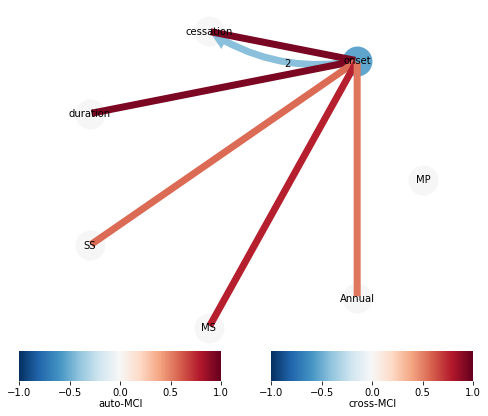

In [26]:
# pour afficher uniquement les liens vers onset
mb1 = np.zeros((7,7,4), dtype=bool)
mb1[:,1,:] = link_matrix[:,1,:]
mb1[1,:,:] = link_matrix[1,:,:]
link_matrix1 = mb1

tp.plot_graph(
    val_matrix=val,
    figsize=(7, 7),
    node_size=30,
    arrowhead_size=1.0,
    arrow_linewidth=35.0,
    link_matrix=link_matrix1,
    var_names=data.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r',
    link_label_fontsize=10)
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/maize/diff_onset.eps')

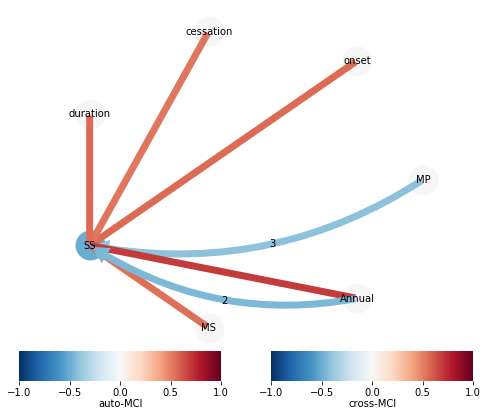

In [28]:
# pour afficher uniquement les liens vers SS
mb1 = np.zeros((7,7,4), dtype=bool)
mb1[:,4,:] = link_matrix[:,4,:]
mb1[4,:,:] = link_matrix[4,:,:]
link_matrix1 = mb1

tp.plot_graph(
    val_matrix=val,
    figsize=(7, 7),
    node_size=30,
    arrowhead_size=1.0,
    arrow_linewidth=35.0,
    link_matrix=link_matrix1,
    var_names=data.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r',
    link_label_fontsize=10)
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/maize/diff_SS.eps')

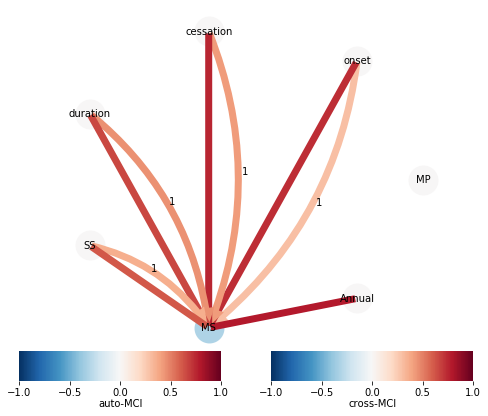

In [61]:
# pour afficher uniquement les liens vers MS
mb1 = np.zeros((7,7,6), dtype=bool)
mb1[:,5,:] = link_matrix[:,5,:]
mb1[5,:,:] = link_matrix[5,:,:]
link_matrix1 = mb1

tp.plot_graph(
    val_matrix=val,
    figsize=(7, 7),
    node_size=30,
    arrowhead_size=1.0,
    arrow_linewidth=35.0,
    link_matrix=link_matrix1,
    var_names=data.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r',
    link_label_fontsize=10)
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/maize/diff_MS.eps')

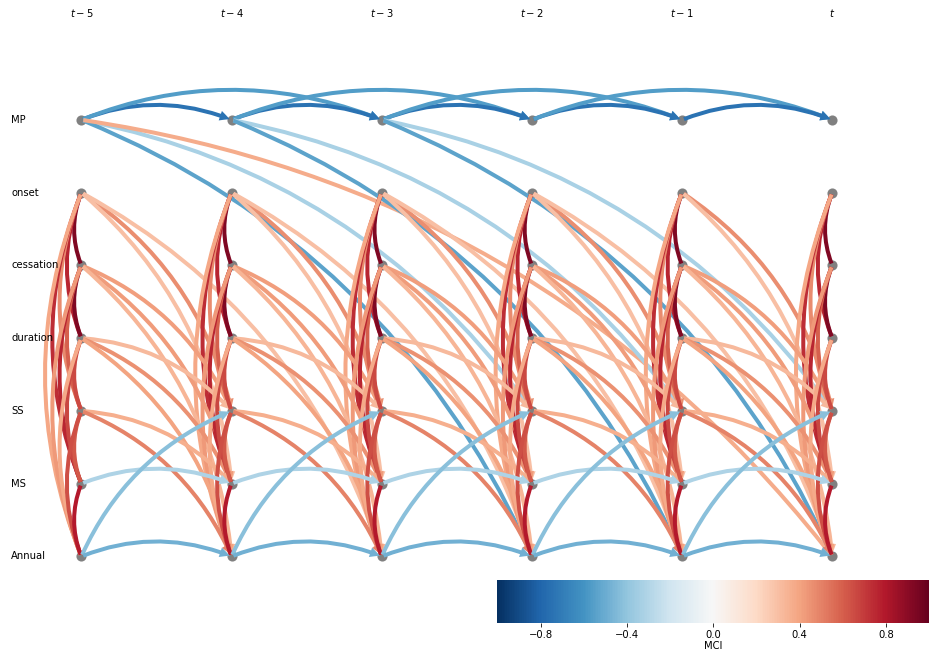

<Figure size 432x288 with 0 Axes>

In [42]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=data.columns,
    link_colorbar_label='MCI',
    figsize=(15, 10),
    )
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/maize/lagedlinks.eps')

In [256]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = None
max_conds_dim = None
max_combinations = 1



## Variable BP

## Variable onset

## Variable cessation

## Variable duration

## Variable SS

## Variable MS

## Variable Annual

## Resulting condition sets:

    Variable BP has 8 parent(s):
    [pc_alpha = 0.4]
        (BP -1): max_pval = 0.00006, min_val = 0.598
        (cessation -3): max_pval = 0.03670, min_val = 0.371
        (onset -2): max_pval = 0.07176, min_val = 0.304
        (onset -7): max_pval = 0.19681, min_val = 0.234
        (SS -3): max_pval = 0.17104, min_val = 0.221
        (duration -8): max_pval = 0.19698, min_val = 0.217
        (BP -2): max_pval = 0.21532, min_val = 0.200
        (BP -3): max_pval = 0.34320, min_val = 0.160

    Variable onset has 4 parent(s):
    [pc_alpha = 0.5]
        (onset -1): max_pval = 0.06365, min_val = 0.300
        (BP -8): max_pval = 0.12779, min_val = 0.248
      

In [28]:
import seaborn as sns

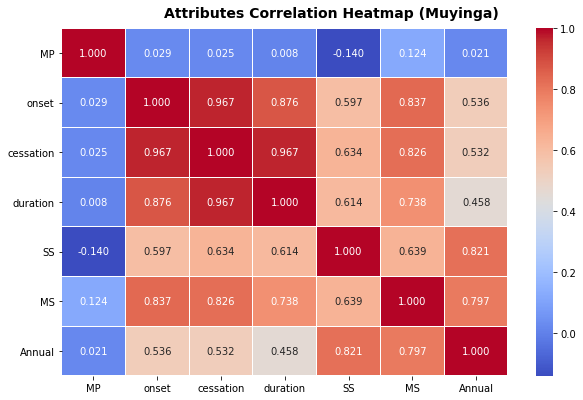

In [43]:
corr = data.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
#ax = sns.heatmap(
#   corr, 
#    vmin=-1, vmax=1, center=0,
#    cmap=sns.diverging_palette(20, 220, n=200),
#    square=False, annot=True
#)
hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.3f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)



#ax.set_xticklabels(
 #   ax.get_xticklabels(),
  #  rotation=45,
   # horizontalalignment='right'
#);

fig.subplots_adjust(top=0.93)
fig.suptitle('Attributes Correlation Heatmap (Muyinga)', 
              fontsize=14, 
              fontweight='bold')

plt.savefig('/home/pbatungwanay/Bureau/Muyinga/maize/Corr.eps')